In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

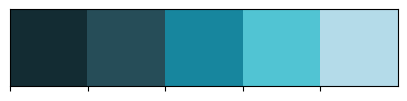

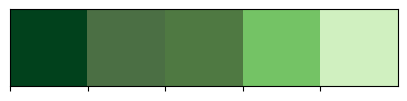

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/7th-project/data/clean_resume_data.csv')
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [ ]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [ ]:
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


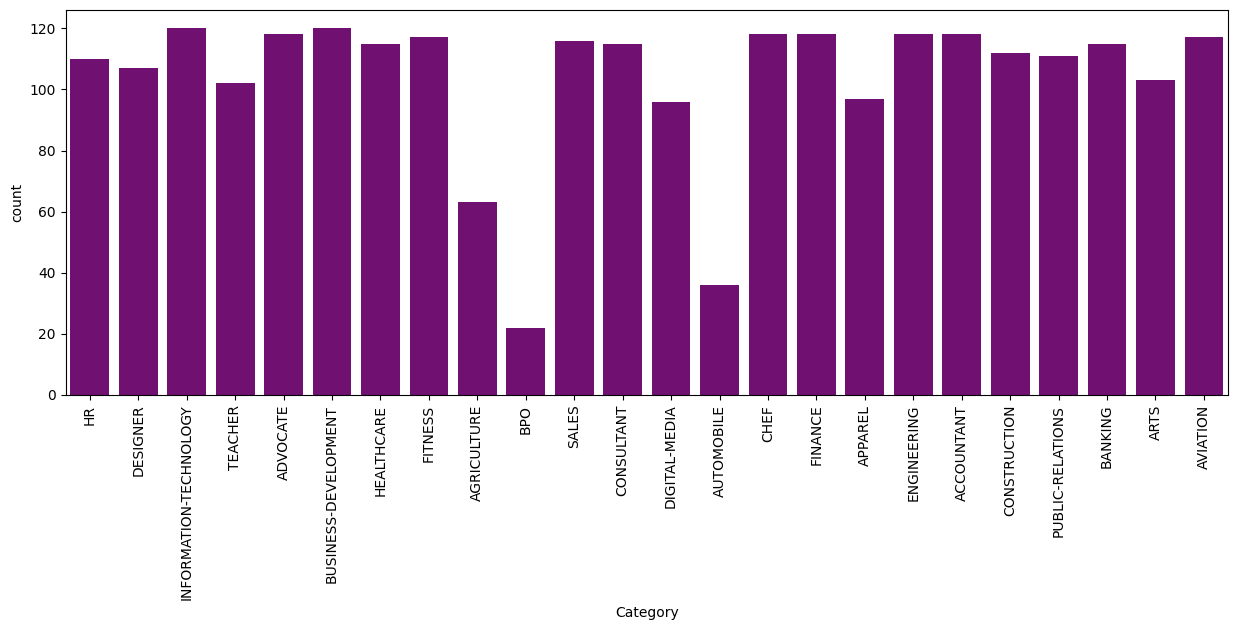

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df,x=df['Category'],color='purple')
plt.xticks(rotation=90)
plt.show()

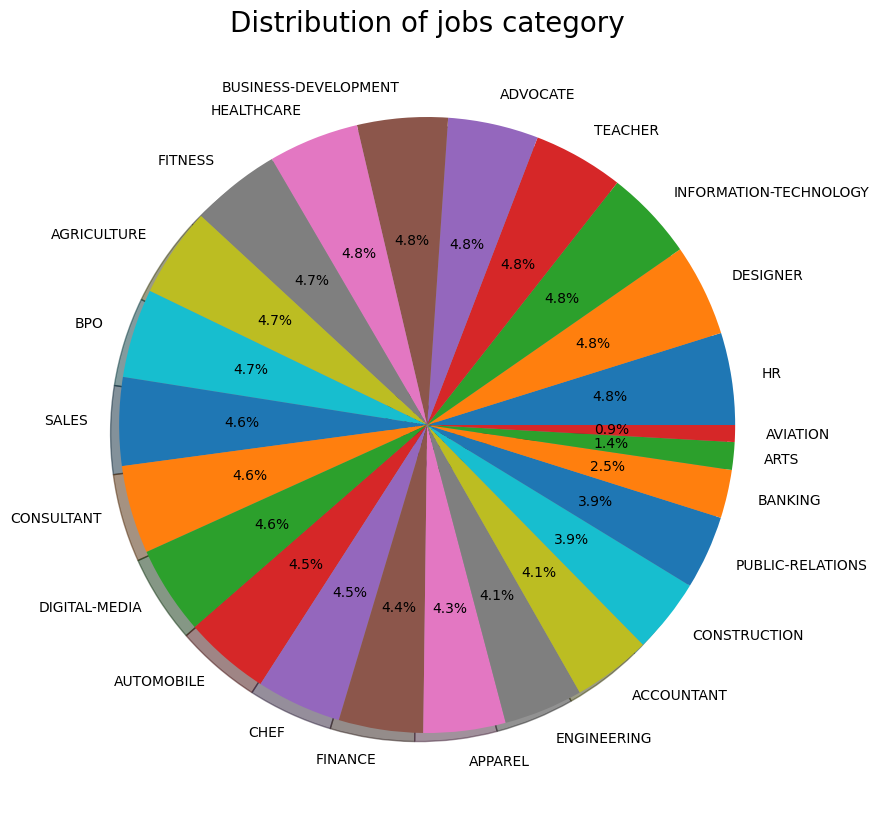

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Distribution of jobs category",size=20)
plt.pie(df['Category'].value_counts(),
        labels=df['Category'].unique(),
        autopct='%1.1f%%',
        shadow=True,)
plt.show()

In [ ]:
print(df['Category'][0],df['Feature'][0])

HR hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city state helps develop polic

In [ ]:
from sklearn.utils import resample

print("Original Category Distribution:")
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()

balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_size:
        # oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_size, random_state=42)
    else:
        # undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_size, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate balanced data for all categories
balanced_df = pd.concat(balanced_data)

Original Category Distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [ ]:
print(balanced_df)

            ID  Category                                            Feature
102   10399912        HR  hr personnel assistant summary u citizen autho...
51    39650734        HR  hr assistant summary hard worker dedicated det...
92    23510685        HR  global hr manager summary global hr profession...
14    27490876        HR  hr coordinator summary applicant screening bac...
106   24402267        HR  designation hr assistant professional summary ...
...        ...       ...                                                ...
2390  26888302  AVIATION  aviation fuel quality control specialist profe...
2392  81588968  AVIATION  superintendent ii summary solutions focused ve...
2455  27512470  AVIATION  assistant cfo professional summary dedicated f...
2426  25718772  AVIATION  tso floater career overview obtain position fa...
2475  25625173  AVIATION  senior lead technologist editor professional p...

[2880 rows x 3 columns]


In [ ]:
balanced_df.isnull().sum()

,0
ID,0
Category,0
Feature,1


In [ ]:
balanced_df.dropna(inplace=True)

In [ ]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(2303,) (576,)


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train_tfidf.shape,X_test_tfidf.shape)

(2303, 29780) (576, 29780)


In [ ]:
def model_training(model,X_train,X_test,y_train,y_test):
  model = OneVsRestClassifier(model())
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f" {model} Results:")

  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 8))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

 OneVsRestClassifier(estimator=RandomForestClassifier()) Results:
Accuracy: 0.8333
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.95      0.95      0.95        21
              ADVOCATE       0.96      0.79      0.87        29
           AGRICULTURE       0.88      0.91      0.89        23
               APPAREL       0.86      0.90      0.88        21
                  ARTS       0.79      0.68      0.73        22
            AUTOMOBILE       0.90      1.00      0.95        19
              AVIATION       0.88      0.93      0.90        30
               BANKING       0.95      0.83      0.88        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.47      0.44      0.46        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.83      0.96      0.89        25
            CONSULTANT       0.89      0.55      0.68        

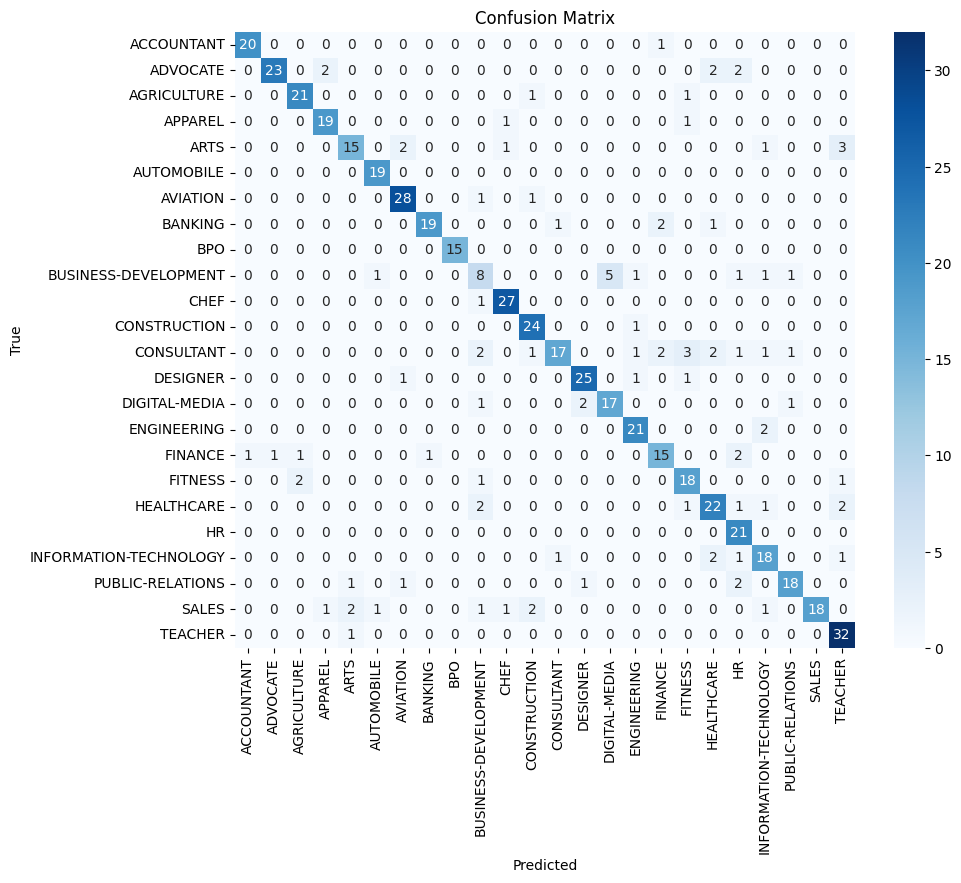

In [ ]:
model_training(RandomForestClassifier
               ,X_train=X_train_tfidf,
               X_test=X_test_tfidf,
               y_train=y_train,
               y_test=y_test)

 OneVsRestClassifier(estimator=SVC()) Results:
Accuracy: 0.8420
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.95      0.89        21
              ADVOCATE       1.00      0.72      0.84        29
           AGRICULTURE       0.82      0.78      0.80        23
               APPAREL       1.00      0.86      0.92        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       0.95      1.00      0.97        19
              AVIATION       0.88      1.00      0.94        30
               BANKING       1.00      0.74      0.85        23
                   BPO       0.94      1.00      0.97        15
  BUSINESS-DEVELOPMENT       0.55      0.61      0.58        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       1.00      0.55      0.71        31
              DE

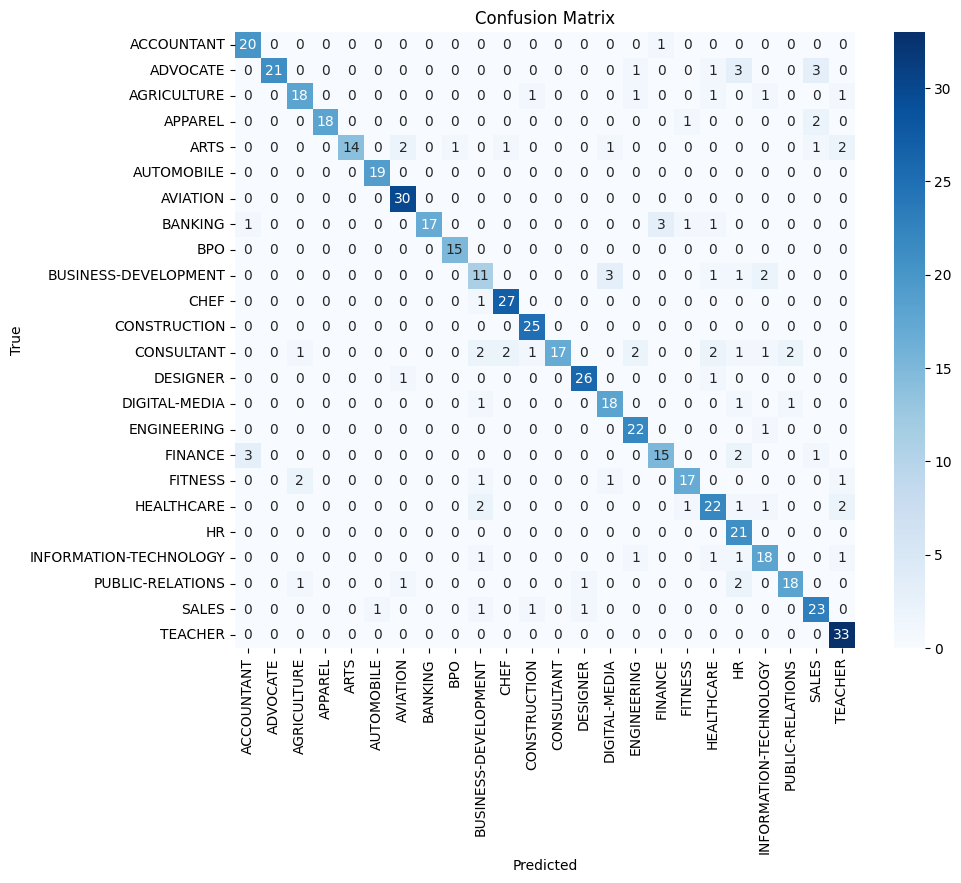

In [ ]:
model_training(SVC,
               X_train=X_train_tfidf,
               X_test=X_test_tfidf,
               y_train=y_train,
               y_test=y_test)

 OneVsRestClassifier(estimator=KNeighborsClassifier()) Results:
Accuracy: 0.6007
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.67      0.76      0.71        21
              ADVOCATE       0.50      0.24      0.33        29
           AGRICULTURE       0.54      0.57      0.55        23
               APPAREL       0.69      0.52      0.59        21
                  ARTS       0.36      0.23      0.28        22
            AUTOMOBILE       0.52      0.79      0.62        19
              AVIATION       0.60      0.50      0.55        30
               BANKING       0.62      0.43      0.51        23
                   BPO       0.61      0.93      0.74        15
  BUSINESS-DEVELOPMENT       0.39      0.39      0.39        18
                  CHEF       0.84      0.93      0.88        28
          CONSTRUCTION       0.80      0.80      0.80        25
            CONSULTANT       0.64      0.23      0.33        31

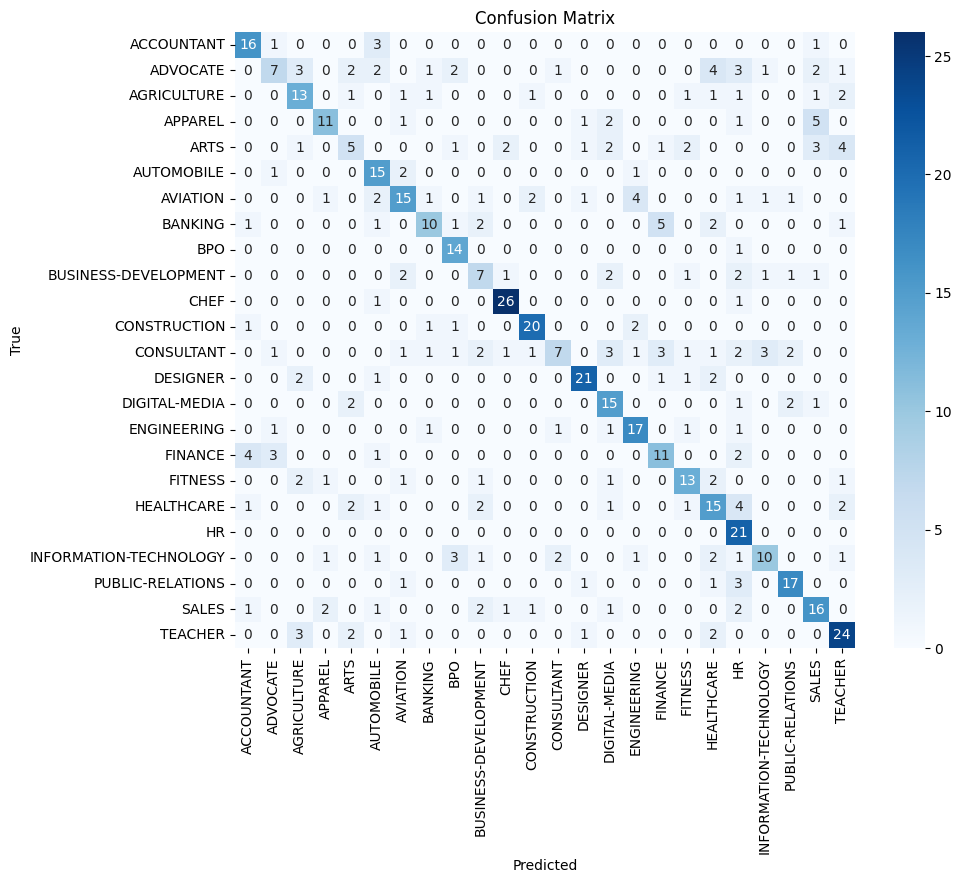

In [ ]:
model_training(KNeighborsClassifier
               ,X_train=X_train_tfidf,
               X_test=X_test_tfidf,
               y_train=y_train,
               y_test=y_test)

 OneVsRestClassifier(estimator=GaussianNB()) Results:
Accuracy: 0.6163
Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.76      0.86        21
              ADVOCATE       1.00      0.55      0.71        29
           AGRICULTURE       1.00      0.57      0.72        23
               APPAREL       0.94      0.76      0.84        21
                  ARTS       1.00      0.59      0.74        22
            AUTOMOBILE       0.95      1.00      0.97        19
              AVIATION       1.00      0.60      0.75        30
               BANKING       1.00      0.61      0.76        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.00      0.00      0.00        18
                  CHEF       1.00      0.75      0.86        28
          CONSTRUCTION       1.00      0.76      0.86        25
            CONSULTANT       0.94      0.52      0.67        31
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


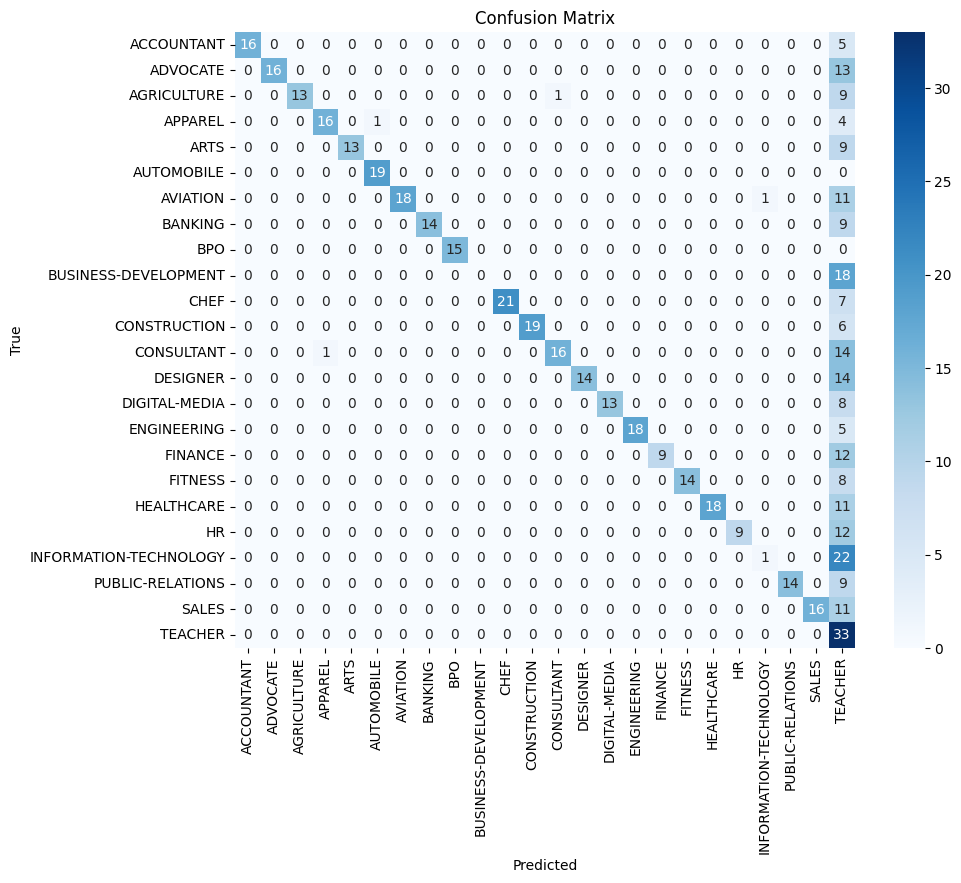

In [ ]:
model_training(GaussianNB
               ,X_train=X_train_tfidf.toarray(),
               X_test=X_test_tfidf.toarray(),
               y_train=y_train,
               y_test=y_test)

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
svc_classifier = SVC()
svc_classifier.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
def predict_category(resume_text,model):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = model.predict(resume_tfidf)[0]
    return predicted_category

In [ ]:
resume_file='information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise planning implementing streamlining systems ensure maximum customer satisfaction business revenue strong leader demonstrated ability work effectively individuals levels functional areas exceptional communication project management skills ability successfully manage multiple priorities assignments skills platforms windows server professional windows xp pro home win dos citrix ica ms exchange hardware hp ibm dell intel based server desktop platforms cisco switches sonic wall hardware vpns hp laser jets toshiba e color copier toshiba sony laptops inter tel software ms office visio citrix metaframe xp symantec pc anywhere ghost antivirus utilities win fax mcafee virus scan adobe acrobat illustrator photoshop partition magic adware spyware networking tcp ip wireless b g dns wins dhcp relevant experience information technology manager network engineer feb current company name city state responsible day day operations functions wilkes six offices staff members currently lead team professionals developers planning upgrades implementation systems business applications development new software tools work closely cio senior management ensure business technology objectives aligned researched new technologies calculated future needs achieve accurate capacity planning negotiated hardware software purchases maintenance contracts dramatically reduced costs maintenance virtualizing company infrastructure using vmware reduced physical servers streamlined disaster recovery processes planned executed active directory domain migration r coordinated planning migration mpls network sites including upgrades routers switches network equipment increased speed reliability company email migrating microsoft exchange streamlined operations designing new citrix infrastructure using netscaler load balancers ensure better speed connectivity less downtime remote offices led planning implementation disaster recovery site atlanta created company first comprehensive business continuity plan tested success installed configuring barracuda spam virus firewalls resulting reduction spam enforced security policies managed monitored updated spam filtering virus malware prevention systems reduced desktop application deployment times designing implementing microsoft system center configuration manager conducted training internal systems local procedures technical subjects company employees coordinate external technology vendors internal staff members third party consultants network engineer sep jan company name city state administered managed windows server network environment responsible lan wan duties local remote networks acted technical consultant clients various projects provide end user support windows xp operating systems installed implemented exchange mail server implemented server desktop security using mcafee enterprise epolicy orchestrator installed configured web servers ftp servers pop mail servers manage cisco switches routers configured vpn remote access users implemented software domain policies patches upgrades using group policy sus trained new employees systems administration web development network support technician jan aug company name city provided network desktop support users provided technical support offices b domain supported help desk using help star software troubleshooting windows desktop computers implemented group policy objects control desktop environment security performed hardware software upgrades replacements performed installations troubleshooting ms office suite managed users computers organizational units active directory created disc images desktop notebook computers using norton ghost troubleshooting repairs laser printers copy machines education bachelor science management information systems university maryland university college city state certifications microsoft certified technology specialist mcts citrix certified administrator cca information systems management certificate project management certificate'

predicted_category = predict_category(resume_file,svc_classifier)
print("Predicted Category:", predicted_category)

Predicted Category: INFORMATION-TECHNOLOGY


In [ ]:
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file,svc_classifier)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [ ]:
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file,svc_classifier)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [ ]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""


predicted_category = predict_category(resume_file,svc_classifier)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [ ]:
import os
import pickle


folder_name = '/content/drive/MyDrive/7th-project/model'

try:
    print("Current Working Directory:", os.getcwd())

    os.makedirs(folder_name, exist_ok=True)
    print(f"Folder '{folder_name}' created successfully or already exists.")

    with open(os.path.join(folder_name, 'svc_classifier_categorization.pkl'), 'wb') as model_file:
        pickle.dump(svc_classifier, model_file)

    # Save the TfidfVectorizer
    with open(os.path.join(folder_name, 'tfidf_vectorizer_categorization.pkl'), 'wb') as vectorizer_file:
        pickle.dump(tfidf_vectorizer, vectorizer_file)

    print(f"Files saved successfully in the '{folder_name}' folder.")

except Exception as e:
    print(f"An error occurred: {e}")

Current Working Directory: /content
Folder '/content/drive/MyDrive/7th-project/model' created successfully or already exists.
Files saved successfully in the '/content/drive/MyDrive/7th-project/model' folder.
